In [1]:
import pandas as pd

In [4]:
## Importing test dataset
data=pd.read_csv("D:\\Hackathons\\Medical\\train_df64byy.csv")

In [5]:
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [6]:
data.shape

(50882, 14)

In [7]:
## Renaming the column
data1=data.rename(columns={"Health Indicator":"Health_Indicator"})
data1.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [8]:
## Just for checking no. of records belongs to which grop. I have used grouping
data1.groupby("City_Code").count();

In [9]:
data1.groupby("Health_Indicator").count();

In [10]:
data1.groupby("Holding_Policy_Duration").count();

In [11]:
data1.groupby("Holding_Policy_Type").count();

In [12]:
data1.groupby("Response").count()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
Response,,,,,,,,,,,,,
0,38673,38673,38673,38673,38673,38673,38673,38673,29720,23261,23261,38673,38673
1,12209,12209,12209,12209,12209,12209,12209,12209,9471,7370,7370,12209,12209


In [ ]:
## From above we can see that data is imbalanced

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


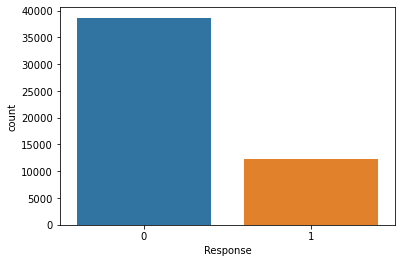

In [13]:
## Plot for visualization of how the data is imbalanced
from seaborn import countplot
from matplotlib import pyplot as plt 
g=countplot(data1['Response'])
g.set_xticklabels(['0','1'])
plt.show()

In [ ]:
## Converting categorical data into numeric values

In [14]:
data1.City_Code.replace(('C1','C2','C3','C4','C5','C6','C7','C8','C9','C10',
                             'C11','C12','C13','C14','C15','C16','C17','C18','C19','C20',
                             'C21','C22','C23','C24','C25','C26','C27','C28','C29','C30',
                             'C31','C32','C33','C34','C35','C36'),(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
                                                                  23,24,25,26,27,28,29,30,31,32,33,34,35),inplace=True)

In [15]:
data1.Accomodation_Type.replace(('Rented','Owned'),(0,1),inplace=True)

In [16]:
data1.Reco_Insurance_Type.replace(('Individual','Joint'),(0,1),inplace=True)

In [17]:
data1.Is_Spouse.replace(('Yes','No'),(0,1),inplace=True)

In [18]:
data1.Health_Indicator.replace(('X1','X2','X3','X4','X5','X6','X7','X8','X9'),(0,1,2,3,4,5,6,7,8),inplace=True)

In [19]:
data1.Holding_Policy_Duration.replace(('1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0','12.0','13.0',
                                           '14.0','14+'),(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14),inplace=True)

In [20]:
data1.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,2,3213,0,0,36,36,1,0.0,14.0,3.0,22,11628.0,0
1,2,4,1117,1,1,75,22,1,1.0,NaN,NaN,22,30510.0,0
2,3,4,3732,1,0,32,32,1,NaN,0.0,1.0,19,7450.0,1
3,4,23,4378,1,1,52,48,1,0.0,14.0,3.0,19,17780.0,0
4,5,7,2190,0,0,44,44,1,1.0,2.0,1.0,16,10404.0,0


In [21]:
## Dropping the columns which just indicating the index

data2=data1.drop(['ID'],axis=1)
data3=data2.drop(['Region_Code'],axis=1)

In [ ]:
data1.dtypes;

In [22]:
## data after dropping 2 columns
data3.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,2,0,0,36,36,1,0.0,14.0,3.0,22,11628.0,0
1,4,1,1,75,22,1,1.0,NaN,NaN,22,30510.0,0
2,4,1,0,32,32,1,NaN,0.0,1.0,19,7450.0,1
3,23,1,1,52,48,1,0.0,14.0,3.0,19,17780.0,0
4,7,0,0,44,44,1,1.0,2.0,1.0,16,10404.0,0


In [23]:
## column names
data3_col=data3.columns
data3_col

Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age',
       'Lower_Age', 'Is_Spouse', 'Health_Indicator', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response'],
      dtype='object')

In [27]:
data3.shape

(50882, 12)

In [29]:
## Imputaion of NAN values by using sklearn.impute
from sklearn.impute import SimpleImputer
my_imputer=SimpleImputer()
data4=my_imputer.fit_transform(data3)

## Splitting data into dependent and independent variables of dataframe data4

y1=data4[:,11]
x1=data4[:,0:11]

In [36]:
## dataframe after imputing NA values
data5=pd.DataFrame(data4)
data6.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.0,0.0,0.0,36.0,36.0,1.0,0.000000,14.000000,3.000000,22.0,11628.0,0.0
1,4.0,1.0,1.0,75.0,22.0,1.0,1.000000,5.156769,2.439228,22.0,30510.0,0.0
2,4.0,1.0,0.0,32.0,32.0,1.0,1.444694,0.000000,1.000000,19.0,7450.0,1.0
3,23.0,1.0,1.0,52.0,48.0,1.0,0.000000,14.000000,3.000000,19.0,17780.0,0.0
4,7.0,0.0,0.0,44.0,44.0,1.0,1.000000,2.000000,1.000000,16.0,10404.0,0.0


In [37]:
## Splitting data into dependent and independent variables of dataframe data3
xa=data3.iloc[:,0:11]
ya=data3.iloc[:,11]

In [38]:
# class count
class_count_0, class_count_1 = data3['Response'].value_counts()

# Separate class
class_0 = data3[data3['Response'] == 0]
class_1 = data3[data3['Response'] == 1]# print the shape of the class
print('Response 0:', class_0.shape)
print('Response 1:', class_1.shape)

Response 0: (38673, 12)
Response 1: (12209, 12)


## Feature Selection Criterion

[0.1508196  0.01421189 0.00365856 0.12047397 0.12162163 0.00461925
 0.11315121 0.07787626 0.04462624 0.12631329 0.2226281 ]


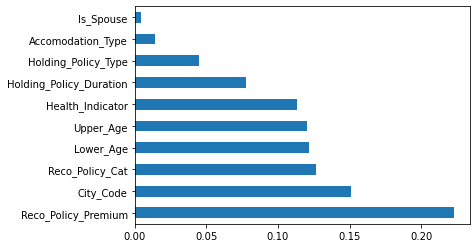

In [39]:
columns=xa.columns
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model_feature = ExtraTreesClassifier()
model_feature.fit(x1,y1)
print(model_feature.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_feature.feature_importances_, index=columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
## Dropping the columns which are less important

In [41]:
d6=data5.drop(data5.columns[5], axis=1)
d7=d6.drop(d6.columns[1], axis=1)
d8=d7.drop(d7.columns[6], axis=1)
d9=d8.drop(d8.columns[5], axis=1)
d9.head()

,0,2,3,4,6,9,10,11
0,2.0,0.0,36.0,36.0,0.000000,22.0,11628.0,0.0
1,4.0,1.0,75.0,22.0,1.000000,22.0,30510.0,0.0
2,4.0,0.0,32.0,32.0,1.444694,19.0,7450.0,1.0
3,23.0,1.0,52.0,48.0,0.000000,19.0,17780.0,0.0
4,7.0,0.0,44.0,44.0,1.000000,16.0,10404.0,0.0


In [134]:
## New x2 y2 after EDA process
y2=y1
x2=d9.iloc[:,0:7]
x2

,0,2,3,4,6,9,10
0,2.0,0.0,36.0,36.0,0.000000,22.0,11628.0
1,4.0,1.0,75.0,22.0,1.000000,22.0,30510.0
2,4.0,0.0,32.0,32.0,1.444694,19.0,7450.0
3,23.0,1.0,52.0,48.0,0.000000,19.0,17780.0
4,7.0,0.0,44.0,44.0,1.000000,16.0,10404.0
...,...,...,...,...,...,...,...
50877,3.0,0.0,22.0,22.0,2.000000,18.0,7704.0
50878,4.0,0.0,27.0,27.0,2.000000,4.0,5408.0
50879,0.0,0.0,63.0,63.0,1.000000,12.0,11374.0
50880,0.0,1.0,71.0,49.0,1.000000,16.0,28179.2


In [81]:
#from sklearn.model_selection import train_test_split
#x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.20,random_state=0)

### Decision Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x2,y2)
pred1=model.predict(x2)
import numpy as np
np.mean(pred1==y2)

0.7603671239338077

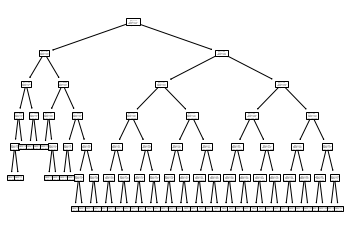

In [83]:
## Decision Tree PLot
from sklearn import tree
tree.plot_tree(model);

In [84]:
import seaborn as sns

### Logistic Regression

In [ ]:
## For finding out weights per class

from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,1000)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(x2, y2)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [130]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression(solver='newton-cg', class_weight={0: 0.3, 1: 0.8})
model_log.fit(x2,y2)

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


LogisticRegression(class_weight={0: 0.3, 1: 0.8}, solver='newton-cg')

In [131]:
pred_log=model_log.predict(x2)

In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrics=confusion_matrix(y2,pred_log)
print(confusion_matrics)

[[27155 11518]
 [ 7992  4217]]


In [133]:
accuracy=((27155+4217)/(27155+4217+11518+7992))
accuracy

0.616563814315475

## Test data set

In [89]:
## Importing test data
df=pd.read_csv("D:\\Hackathons\\Medical\\test_YCcRUnU.csv")
df1=df.rename(columns={"Health Indicator":"Health_Indicator"})
df1.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [90]:
## Convert categorical data into numerical

In [91]:
df1.City_Code.replace(('C1','C2','C3','C4','C5','C6','C7','C8','C9','C10',
                             'C11','C12','C13','C14','C15','C16','C17','C18','C19','C20',
                             'C21','C22','C23','C24','C25','C26','C27','C28','C29','C30',
                             'C31','C32','C33','C34','C35','C36'),(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
                                                                  23,24,25,26,27,28,29,30,31,32,33,34,35),inplace=True)

In [92]:
df1.Accomodation_Type.replace(('Rented','Owned'),(0,1),inplace=True)

In [93]:
df1.Reco_Insurance_Type.replace(('Individual','Joint'),(0,1),inplace=True)

In [94]:
df1.Is_Spouse.replace(('Yes','No'),(0,1),inplace=True)

In [95]:
df1.Health_Indicator.replace(('X1','X2','X3','X4','X5','X6','X7','X8','X9'),(0,1,2,3,4,5,6,7,8),inplace=True)

In [96]:
df1.Holding_Policy_Duration.replace(('1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0','12.0','13.0',
                                           '14.0','14+'),(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14),inplace=True)

In [97]:
## Dropping columns
df2=df1.drop(['ID'],axis=1)
df3=df2.drop(['Region_Code'],axis=1)

In [98]:
df3.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,0,1,0,30,30,1,NaN,5.0,3.0,5,11934.0
1,3,1,1,69,68,0,0.0,2.0,3.0,18,32204.8
2,0,0,0,28,28,1,2.0,1.0,4.0,17,9240.0
3,2,0,0,23,23,1,2.0,2.0,3.0,18,9086.0
4,0,1,0,75,75,1,2.0,NaN,NaN,5,22534.0


In [99]:
#from sklearn.impute import SimpleImputer
my_imputer1=SimpleImputer()
df4=my_imputer1.fit_transform(df3)
#y1=data5[:,11]

In [100]:
df5=pd.DataFrame(df4)
df5.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,30.0,30.0,1.0,1.425378,5.000000,3.000000,5.0,11934.0
1,3.0,1.0,1.0,69.0,68.0,0.0,0.000000,2.000000,3.000000,18.0,32204.8
2,0.0,0.0,0.0,28.0,28.0,1.0,2.000000,1.000000,4.000000,17.0,9240.0
3,2.0,0.0,0.0,23.0,23.0,1.0,2.000000,2.000000,3.000000,18.0,9086.0
4,0.0,1.0,0.0,75.0,75.0,1.0,2.000000,5.193834,2.440085,5.0,22534.0


In [135]:
df6=df5.drop(df5.columns[5], axis=1)
df7=df5.drop(df6.columns[1], axis=1)
df8=df7.drop(df7.columns[6], axis=1)
df9=df8.drop(df8.columns[6], axis=1)
df10=df9.drop(df9.columns[4], axis=1)

df10.head()
#df8.head()

,0,2,3,4,6,9,10
0,0.0,0.0,30.0,30.0,1.425378,5.0,11934.0
1,3.0,1.0,69.0,68.0,0.000000,18.0,32204.8
2,0.0,0.0,28.0,28.0,2.000000,17.0,9240.0
3,2.0,0.0,23.0,23.0,2.000000,18.0,9086.0
4,0.0,0.0,75.0,75.0,2.000000,5.0,22534.0


In [161]:
X=df10.iloc[:,:]
result=model_log.predict(X)
Result=pd.DataFrame(result)
Result.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [162]:
Result.shape

(21805, 1)

In [163]:
Result.columns=['Response']
#Result.groupby('Response').count()
Result.head()

,Response
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [164]:
submission=pd.read_csv("D:\\Hackathons\\Medical\\sample_submission_QrCyCoT.csv")
submission.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [165]:
c1=Result.iloc[:,0]
c2=submission.iloc[:,0]

In [166]:
c1.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Response, dtype: float64

In [167]:
c2.head()

0    50883
1    50884
2    50885
3    50886
4    50887
Name: ID, dtype: int64

In [168]:
data=[submission["ID"],Result["Response"]]
headers=["ID","Response"]
Final_Submission=pd.concat(data,axis=1,keys=headers)

## Submission .csv file

In [169]:
Final_Submission.to_csv(r'D:\DATA_science\Submission_logistic.csv',index=False)

In [170]:
Final_Submission.head()

,ID,Response
0,50883,0.0
1,50884,0.0
2,50885,0.0
3,50886,0.0
4,50887,0.0


In [171]:
Final_Submission.groupby('Response').count()

,ID
Response,
0.0,15092
1.0,6713
